1 Задача - ответить на вопрос есть ли связь между жёсткостью воды и средней годовой смертностью?
Построить точечный график
Рассчитать коэффициенты корреляции Пирсона и Спирмена
Построить модель линейной регрессии
Рассчитать коэффициент детерминации
Вывести график остатков

2 Задание.
Сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('water.csv')
data.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


Text(0.5, 1.0, 'Корреляция между среднегодовой смертностью и уровнем жесткости воды')

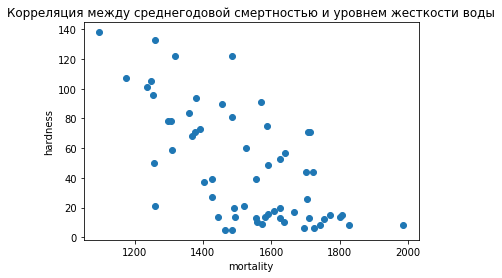

In [6]:
plt.scatter(data['mortality'], data['hardness'])
plt.xlabel('mortality')
plt.ylabel('hardness')
plt.title('Корреляция между среднегодовой смертностью и уровнем жесткости воды')

По графику можно сделать вывод, что есть обратная корреляция: чем выше жесткость воды, тем меньше среднегодовая смертность

In [7]:
#коэффициент корреляция Пирсона равен -0,654849
data[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


In [8]:
#коэффициент корреляция Спирмена равен -0,631665
data[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


In [10]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [11]:
X = data[['mortality']].values
Y = data['hardness'].values

In [12]:
X = sm.add_constant(X)

In [13]:
model = sm.OLS(Y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     44.30
Date:                Sun, 20 Sep 2020   Prob (F-statistic):           1.03e-08
Time:                        17:31:28   Log-Likelihood:                -291.01
No. Observations:                  61   AIC:                             586.0
Df Residuals:                      59   BIC:                             590.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        249.7769     30.666      8.145      0.0

In [14]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  [ 2.49776928e+02 -1.32924533e-01]
R2:  0.42882671931249716


То есть модель линейной регрессии выглядит так: y = -0,1329*x + 249,7769
Коэффициент детерминации равен 0,429

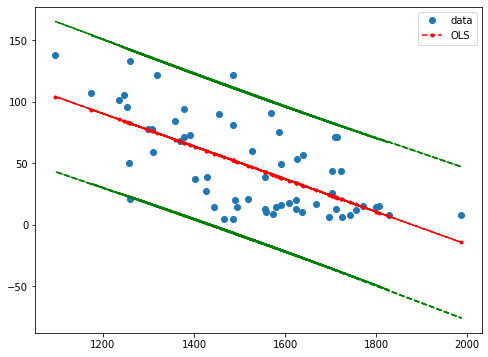

In [15]:
prstd, iv_l, iv_u = wls_prediction_std(results)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(X[:,1], Y, 'o', label="data")
ax.plot(X[:,1], results.fittedvalues, 'r--.', label="OLS")
ax.plot(X[:,1], iv_u, 'g--')
ax.plot(X[:,1], iv_l, 'g--')
ax.legend(loc='best');

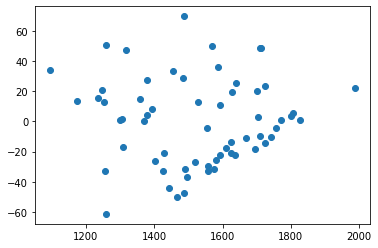

In [16]:
#график остатков
plt.scatter(X[:, 1], results.resid)

(array([ 2.,  3., 11., 10.,  9.,  9.,  8.,  3.,  5.,  1.]),
 array([-61.29201633, -48.18792189, -35.08382745, -21.97973301,
         -8.87563857,   4.22845587,  17.33255031,  30.43664475,
         43.54073919,  56.64483363,  69.74892807]),
 <a list of 10 Patch objects>)

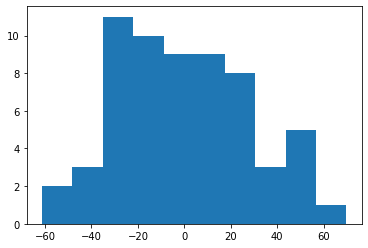

In [17]:
#закон распределения остатков
plt.hist(results.resid)

Для южных городов

In [21]:
data_s = data.loc[data['location']=='South']
data_s.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
2,3,South,Birmingham,1466,5
7,8,South,Bournemouth,1299,78
9,10,South,Brighton,1359,84
10,11,South,Bristol,1392,73


Text(0.5, 1.0, 'Корреляция между среднегодовой смертностью и уровнем жесткости воды в южных городах')

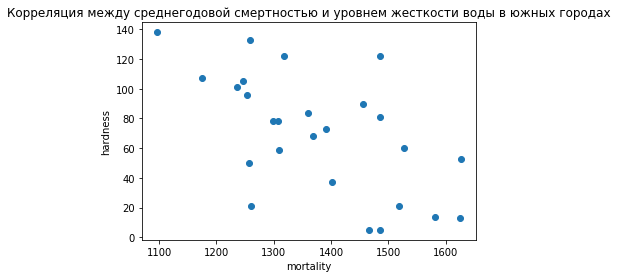

In [22]:
plt.scatter(data_s['mortality'], data_s['hardness'])
plt.xlabel('mortality')
plt.ylabel('hardness')
plt.title('Корреляция между среднегодовой смертностью и уровнем жесткости воды в южных городах')

По графику можно сделать вывод, что есть обратная корреляция: чем выше жесткость воды, тем меньше среднегодовая смертность, однако, взаимосвязь уже не такая сильная, как в случае всех регионов

In [25]:
#коэффициент корреляция Пирсона равен -0,602153
data_s[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.602153
hardness,-0.602153,1.000000


In [26]:
#коэффициент корреляция Спирмена равен -0,595723
data_s[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.595723
hardness,-0.595723,1.000000


In [27]:
X = data_s[['mortality']].values
Y = data_s['hardness'].values

In [28]:
X = sm.add_constant(X)

In [29]:
model = sm.OLS(Y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     13.65
Date:                Sun, 20 Sep 2020   Prob (F-statistic):            0.00113
Time:                        17:46:34   Log-Likelihood:                -126.67
No. Observations:                  26   AIC:                             257.3
Df Residuals:                      24   BIC:                             259.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        308.3177     64.883      4.752      0.0

In [30]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  [ 3.08317671e+02 -1.73261990e-01]
R2:  0.3625885624364602


То есть модель линейной регрессии выглядит так: y = -0,1733*x + 308,3177
Коэффициент детерминации равен 0,363

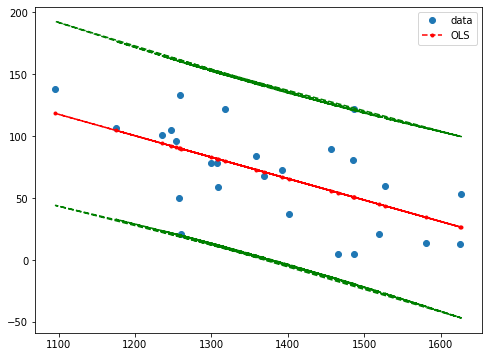

In [31]:
prstd, iv_l, iv_u = wls_prediction_std(results)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(X[:,1], Y, 'o', label="data")
ax.plot(X[:,1], results.fittedvalues, 'r--.', label="OLS")
ax.plot(X[:,1], iv_u, 'g--')
ax.plot(X[:,1], iv_l, 'g--')
ax.legend(loc='best');

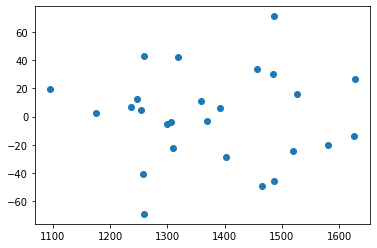

In [32]:
#график остатков
plt.scatter(X[:, 1], results.resid)

(array([1., 2., 2., 4., 3., 6., 3., 4., 0., 1.]),
 array([-69.00756398, -54.99184301, -40.97612203, -26.96040106,
        -12.94468009,   1.07104088,  15.08676186,  29.10248283,
         43.1182038 ,  57.13392477,  71.14964575]),
 <a list of 10 Patch objects>)

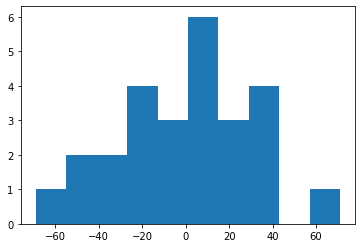

In [33]:
#закон распределения остатков
plt.hist(results.resid)

Для северных городов

In [34]:
data_n = data.loc[data['location']=='North']
data_n.head()

,Unnamed: 0,location,town,mortality,hardness
1,2,North,Birkenhead,1668,17
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
5,6,North,Bolton,1558,10
6,7,North,Bootle,1807,15


Text(0.5, 1.0, 'Корреляция между среднегодовой смертностью и уровнем жесткости воды в северных городах')

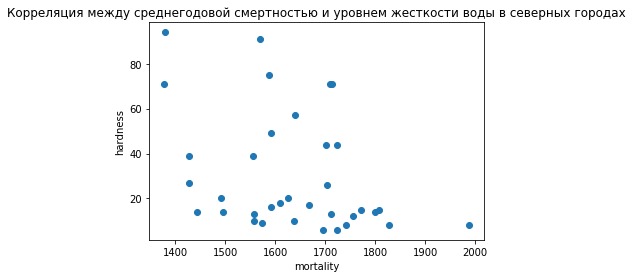

In [35]:
plt.scatter(data_n['mortality'], data_n['hardness'])
plt.xlabel('mortality')
plt.ylabel('hardness')
plt.title('Корреляция между среднегодовой смертностью и уровнем жесткости воды в северных городах')

По графику можно сделать вывод, что есть обратная корреляция: чем выше жесткость воды, тем меньше среднегодовая смертность, однако, взаимосвязь уже не такая сильная, как в случае всех регионов. Более того, взаимосвязь меньше даже в случае анализа южных городов

In [38]:
#коэффициент корреляция Пирсона равен -0,368598
data_n[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.368598
hardness,-0.368598,1.000000


In [39]:
#коэффициент корреляция Спирмена равен -0,404208
data_n[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.404208
hardness,-0.404208,1.000000


In [40]:
X = data_n[['mortality']].values
Y = data_n['hardness'].values

In [41]:
X = sm.add_constant(X)

In [42]:
model = sm.OLS(Y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                  0.110
Method:                 Least Squares   F-statistic:                     5.188
Date:                Sun, 20 Sep 2020   Prob (F-statistic):             0.0293
Time:                        17:53:10   Log-Likelihood:                -160.81
No. Observations:                  35   AIC:                             325.6
Df Residuals:                      33   BIC:                             328.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        145.3191     50.623      2.871      0.0

In [43]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  [ 1.45319062e+02 -7.03471243e-02]
R2:  0.1358643664207171


То есть модель линейной регрессии выглядит так: y = -0,0703*x + 145,3191
Коэффициент детерминации равен 0,136

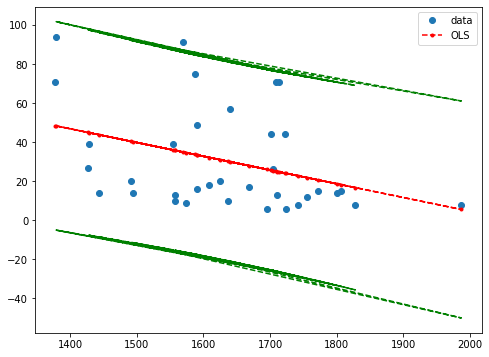

In [44]:
prstd, iv_l, iv_u = wls_prediction_std(results)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(X[:,1], Y, 'o', label="data")
ax.plot(X[:,1], results.fittedvalues, 'r--.', label="OLS")
ax.plot(X[:,1], iv_u, 'g--')
ax.plot(X[:,1], iv_l, 'g--')
ax.legend(loc='best');

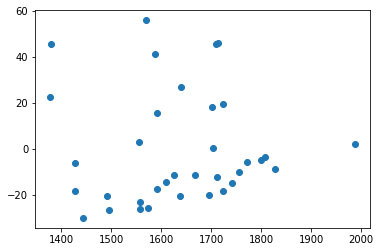

In [45]:
#график остатков
plt.scatter(X[:, 1], results.resid)

(array([5., 8., 8., 4., 0., 3., 2., 0., 4., 1.]),
 array([-29.73781476, -21.15847571, -12.57913666,  -3.9997976 ,
          4.57954145,  13.1588805 ,  21.73821956,  30.31755861,
         38.89689766,  47.47623672,  56.05557577]),
 <a list of 10 Patch objects>)

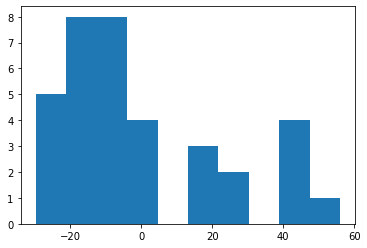

In [46]:
#закон распределения остатков
plt.hist(results.resid)

Таким образом, в среднем можно утверждать, что имеется взаимосвязь (обратная корреляция) среднегодовой смертности с уровнем жесткости воды. Однако, если мы рассматриваем регионы (южный и северный) по отдельности, то можно говорить о том, что такая взаимосвязь характерна для южных регионов, нежели для северных. 